         148
day       34
stand     31
love      29
Oh        24
days      18
know      18
wait      18
boy       17
die       16
Name: wordcount, dtype: int64


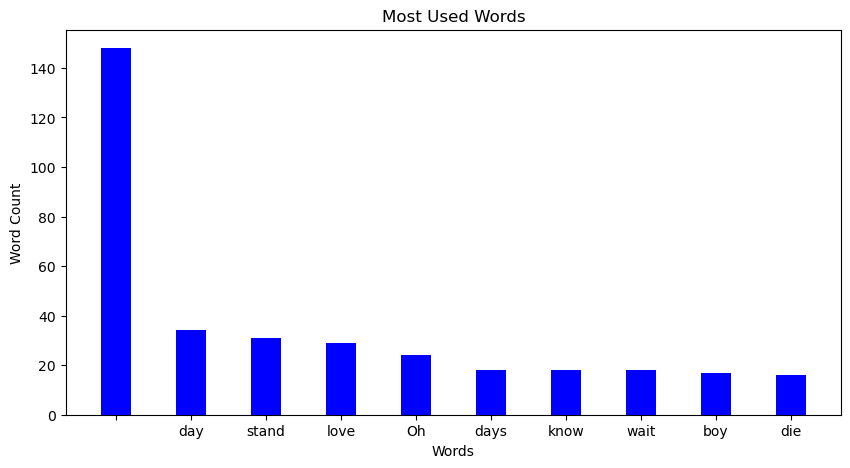

In [1]:
from NLP import index_commonality_df, is_stop_word, get_stores, initialize
from NLP import graphics as gfx
import numpy as np
import os
import pandas as pd

folder_path = '/data'
files_in_folder = os.listdir(os.getcwd()+folder_path)
files = []
for file in files_in_folder:
    files.append(folder_path[1:] + "/" + file)

initialize(files)
commonality = index_commonality_df()

df = commonality["wordcount"]
df["index"] = df.index.astype(str)
df = df[df["index"].apply(is_stop_word) == False]
df = df[df["index"] != "Jolene"]
df = df[df["index"] != " "]
df = df.dropna()
gfx.bar_plot(df["wordcount"],  "Most Used Words", "Words", "Word Count")



In [2]:
data = get_stores()

lst_files = []
for i in list(data.keys()):
    lst_files.append(i.split('/')[-1])
print(lst_files)

['ctry1.txt', 'ctry2.txt', 'ctry3.txt', 'ctry4.txt', 'ctry5.txt', 'pop1.txt', 'pop2.txt', 'pop3.txt', 'pop4.txt', 'pop5.txt']


In [14]:
data['data/ctry2.txt']["wordcount"]

,wordcount
Know,1
were,4
jumping,1
the,33
gun,2
...,...
is,1
passin,1
by,1
Im,1


In [4]:
examp = data['data/ctry1.txt']['wordcount']
examp.index.drop('')
examp['word'] = examp.index
examp
examp_dict = dict(zip(examp['word'], examp['wordcount']))
examp_dict

{'': 7,
 'Jolene': 29,
 'Im': 3,
 'warnin’': 1,
 'you': 13,
 'dont': 3,
 'come': 2,
 'for': 2,
 'my': 6,
 'man': 7,
 'Dont': 2,
 'take': 1,
 'the': 1,
 'chance': 1,
 'because': 1,
 'think': 1,
 'can': 2,
 'You’re': 1,
 'beautiful': 1,
 'beyond': 1,
 'compare': 1,
 'Takes': 1,
 'more': 1,
 'than': 2,
 'beauty': 1,
 'and': 9,
 'seductive': 1,
 'stares': 1,
 'To': 1,
 'between': 3,
 'a': 8,
 'family': 1,
 'happy': 3,
 'woman': 2,
 'too': 1,
 'Thе': 1,
 'games': 1,
 'play': 1,
 'are': 1,
 'nothing': 1,
 'new': 1,
 'So': 1,
 'want': 2,
 'no': 1,
 'hеat': 1,
 'with': 3,
 'me': 8,
 'Weve': 1,
 'been': 1,
 'deep': 1,
 'in': 5,
 'love': 1,
 'twenty': 1,
 'years': 1,
 'I': 10,
 'raised': 2,
 'that': 1,
 'his': 1,
 'kids': 1,
 'know': 3,
 'better': 1,
 'he': 3,
 'knows': 1,
 'himself': 1,
 'Yeah': 1,
 'what': 1,
 'easily': 1,
 'understand': 1,
 'Why': 1,
 'youre': 1,
 'attracted': 1,
 'to': 4,
 'But': 1,
 'this': 2,
 'smoke': 1,
 'so': 1,
 'shoot': 1,
 'your': 3,
 'shot': 1,
 'someone': 1,
 'else

In [5]:
data.items()
for i, (file_name, word_count) in enumerate(data.items(), 1):
    print(word_count["wordcount"].wordcount)

            7
Jolene     29
Im          3
warnin’     1
you        13
           ..
them        1
Ima         4
her         2
she         2
him         2
Name: wordcount, Length: 175, dtype: int64
Know        1
were        4
jumping     1
the        33
gun         2
           ..
is          1
passin      1
by          1
Im          1
Mm          1
Name: wordcount, Length: 132, dtype: int64
           21
Nothin      1
really      1
ends        1
For         1
           ..
am          1
one         1
cleanse     1
Fathers     1
sins        1
Name: wordcount, Length: 191, dtype: int64
You       7
call      2
me        8
pretty    3
little    7
         ..
In        1
world     1
best      1
of        1
things    1
Name: wordcount, Length: 236, dtype: int64
              21
Hello          3
girls          1
Beyoncé        2
fellas         1
              ..
But            1
Ohohohohoh     1
Ah             2
vote           1
woahoh         1
Name: wordcount, Length: 288, dtype: int64
    

In [15]:
import plotly.graph_objects as go

# make_sankey function
def make_sankey(df, src, targ):
    """
        :param df: Input dataframe
        :param src: the column in df used for source for sankey
        :param targ:  the column in df used for target for sankey
        :return: Plotly Figure object
        """

    #Store unique labels from src and targ, to remove repeating after groupby
    source_labels = list(df[src].unique())
    target_labels = list(df[targ].unique())

    # map labels to indexes
    link = {
        'source': df[src].map(lambda x: source_labels.index(x)),
        'target': df[targ].map(lambda x: len(source_labels) + target_labels.index(x)),
        'value': df['value']
    }

    node = {'label': source_labels + target_labels}
    #make sankey
    sk = go.Sankey(link=link, node=node)
    fig = go.Figure(sk)
    fig.show()

In [7]:
def sankey_wordcount(word_list=None, k=None):
    """
    Generates a Sankey diagram to visualize word counts across songs

    Args:
        word_list (list, optional): Specific set of words to include.
        k (int, optional): Number of most frequent words to include.
    """
    if k:
        # if k is passed, use the top k words in terms of total count
        #df refers to the dataframe with total word counts from all files
        sorted_df = df.sort_values(by='wordcount', ascending=False)
        word_list = list(sorted_df.head(k).index)

    # init empty list for creating a df
    data_list = []

    # Iterate over each word and file to fill in the data list with (name, word, count)
    for word in word_list:
        for file_name in lst_files:
            try:
                #get the count for that song and word
                count = data['data/' + file_name]["wordcount"].loc[word].wordcount
            except KeyError:
                # if keyerror, just input 0, keyerror means no occurance
                count = 0
            
            # Append data as tuple (filename, word, count) to the list
            data_list.append((file_name, word, count))

    # Create DataFrame from the list, set cols
    filtered_df = pd.DataFrame(data_list, columns=['filename', 'word', 'value'])

    #call make_sankey() using the filtered_df built, and src/targ cols from filtered_df
    make_sankey(filtered_df, 'filename', 'word')

sankey_wordcount(word_list=['day', 'stand', 'love', 'Oh', 'days', 'boy', 'die', 'wait'])

C:\Users\codyh\AppData\Local\Temp\ipykernel_33588\3428801620.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\codyh\AppData\Local\Temp\ipykernel_33588\3428801620.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\codyh\AppData\Local\Temp\ipykernel_33588\3428801620.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

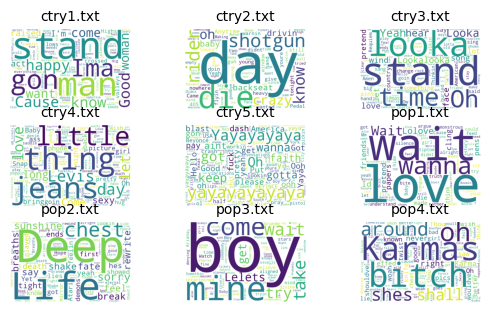

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
def songs_wordcloud(self):
    """
    Makes and displays a wordcloud for each song
    """
    wordcloud = WordCloud(width=600, height=400, background_color='white')
    fig = plt.figure()
    #filter out stop words
    df = df[df["index"].apply(is_stop_word) == False]

    for i, file_name in enumerate(lst_files, 1):
        if i <= 9:
            #get the df returned from passing in the filename to data
            song_df = data['data/'+file_name]['wordcount']
            #remove any empty strings, as sometimes stopword filtering fails at removing these
            song_df.index.drop('')

            #filter out the stopwords
            song_df = song_df[~song_df.index.map(is_stop_word)]


            #add column to the df so that there is a 'word' column instead of using index
            song_df['word'] = song_df.index
            #turn it into a dict for word cloud processing
            song_dict = dict(zip(song_df['word'], song_df['wordcount']))
            song_dict
            
            cloud = wordcloud.generate_from_frequencies(song_dict)
            fig.add_subplot(4, 3, i)
            plt.imshow(cloud)
            plt.title(file_name, fontsize=10)
            plt.axis("off")

    plt.show()